In [1]:
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt

t-SNE (t-Stochastic Neighbourhood Embedding) takes a high dimensional dataset and provides a projection onto low dimensional spaces in a non-linear fashion that preserves a notion of clustering proximity.

In the high dimensional representation (which our data typically lives in), the probability that the $i^{th}$ example/data point would choose the $j^{th}$ as a neighbor is given in this model by: $$p_{j|i} = \frac{\exp{\left(||x_i - x_j||^2/2 \sigma_i^2 \right)}}{\sum_{k\neq i} \exp{\left(||x_i - x_k||^2/2 \sigma_i^2 \right)}}.$$In the space we want to project to (typically 1-3 dimensional, for visualization), we have a similar conditional probability $$p_{j|i} = \frac{\exp{\left(||y_i - y_j||^2 \right)}}{\sum_{k\neq i} \exp{\left(||y_i - y_k||^2\right)}},$$where the $\{y_k\}$ are the projected locations of $\{x_k\}$. Set $p_{i|i} = q_{i|i} = 0$.

SNE minimizes the Kullback-Leibler divergences over all datapoints using gradient descent. i.e., $y_i$ is assigned and updated by taking the corresponding partial derivative of the cost function: $$C = \sum_i D_{KL}(P_i || Q_i) = \sum_i \sum_j p_{j|i} \log{\frac{p_{j|i}}{q_{j|i}}}.$$
The only thing that remains to be prescribed is a method to determine $\sigma_i$.

The way we prescribe $\sigma_i$ is through a hyperparameter known as the perplexity. In terms of the Shannon entropy $$H(P_i) = - \sum_j p_{j|i} \log_2{p_{j|i}},$$ we define the perplexity as $$Perp(P_i) = 2^{H(P_i)}.$$ SNE performs a binary search for the value of $\sigma_i$ to correspond to the user specified perplexity. According to the creators, SNE is fairly robust to changes in the perplexity with typical values between 5 and 50. The perplexity can be interpreted as a smooth measure of the effective number of neighbors.

Just for fun, let's also check out the gradient: $$\frac{\delta C}{\delta y_i} = 2 \sum_j (p_{j|i} - q_{j|i} + p_{i|j} - q_{i|j})(y_i - y_j).$$ Physically, the gradient may be interpreted as the resultant force created by a set of springs between the map point yi and all other map points yj. All springs exert a force along the direction (yi−yj). The spring between $y_i$ and $y_j$ repels or attracts the map points depending on whether the distance between the two in the map is too small or too large to represent the similarities between the two high-dimensional datapoints. The force exerted by the spring between $y_i$ and $y_j$ is proportional to its length, and also proportional to its stiffness, which is the mismatch $(p_{j|i} - q_{j|i} + p_{i|j} - q_{i|j})$ between the pairwise similarities of the data points and the map points.

This is taken from [here.](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

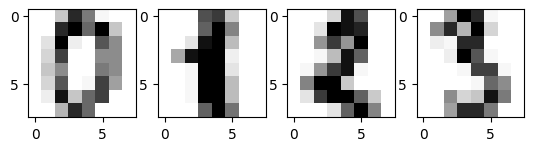

(1797, 64)


In [3]:
digits = load_digits()
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

print(digits.data.shape)

In [6]:
y_digits = digits.target
X_digits = digits.data

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=42, perplexity=45, learning_rate=10) # Project onto a 2 dimensional subspace
# Research recommends PCA based initialization
#
X_digits_tsne = tsne.fit_transform(X_digits)

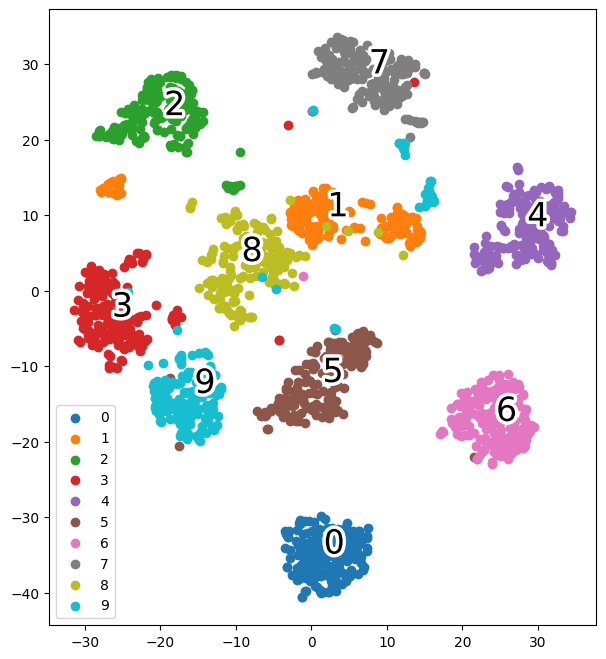

In [7]:
import numpy as np

import matplotlib.patheffects as PathEffects

def plot_projection(x, colors):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0], x[colors == i, 1], label=str(i))
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()
        ])
    plt.legend()
    plt.show()

plot_projection(X_digits_tsne, y_digits)